## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from BorutaShap import BorutaShap
import warnings
warnings.filterwarnings('ignore')

D:\Python3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\Python3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
D:\Python3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
D:\Python3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


## Read the data

In [3]:
df = pd.read_csv('./data/train/original.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 77 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Image                                               127 non-null    object 
 1   Mask                                                127 non-null    object 
 2   ID                                                  127 non-null    int64  
 3   y                                                   127 non-null    int64  
 4   original_glcm_Autocorrelation                       127 non-null    float64
 5   original_glcm_JointAverage                          127 non-null    float64
 6   original_glcm_ClusterProminence                     127 non-null    float64
 7   original_glcm_ClusterShade                          127 non-null    float64
 8   original_glcm_ClusterTendency                       127 non-null    float64
 9  

In [4]:
df.head()

,Image,Mask,ID,y,original_glcm_Autocorrelation,original_glcm_JointAverage,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,...,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,I:\Series\3\data.nrrd,I:\Series\3\seg1.nrrd,3,1,879.017944,29.006695,102519.53530,-888.628689,194.091028,43.662105,...,0.014396,0.001754,0.351948,292.701894,0.000698,4.997464,0.000127,3937.318085,0.167825,0.132335
1,I:\Series\4\data.nrrd,I:\Series\4\seg1.nrrd,4,1,740.055912,25.972572,214556.61810,-3880.979299,297.461519,36.055757,...,0.059502,0.005485,0.283877,128.701294,0.002257,0.494121,0.002002,1310.888493,0.330546,1.144465
2,I:\Series\5\data.nrrd,I:\Series\5\seg1.nrrd,5,0,407.441884,19.001428,97269.21214,265.978672,208.139221,22.815024,...,0.189473,0.005878,0.220989,98.608640,0.001003,10.214179,0.000156,1302.019099,0.141408,0.088642
3,I:\Series\5\data.nrrd,I:\Series\5\seg2.nrrd,5,1,333.866681,17.322945,60198.02019,58.445276,157.687670,22.709848,...,0.166330,0.007451,0.229825,82.155794,0.001579,3.186253,0.000520,1249.633382,0.129049,0.270992
4,I:\Series\7\data.nrrd,I:\Series\7\seg1.nrrd,7,1,712.583231,25.705584,119684.53370,-1444.645136,223.268060,16.178844,...,0.043943,0.002763,0.185076,119.461003,0.000590,4.020551,0.000143,2685.836003,0.076159,0.201385


In [5]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['y']))}
class_mapping

{0: 0, 1: 1}

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize

df['y'] = df['y'].map(class_mapping)
y = LabelEncoder().fit_transform(df['y'].values)
X = df.iloc[:,4:77].values
print(y.shape)
print(X.shape)

(127,)
(127, 73)


In [7]:
features = df.columns[4:77]

In [8]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_std = std.fit_transform(X)
print(X_std.shape)

(127, 73)


## Feature selection by using BorutaShap

In [15]:
df_X = df.iloc[:,4:77]#.values
df_y = df.iloc[:, 3]#.values

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight = 'balanced', random_state=0)
Feature_Selector = BorutaShap(importance_measure='shap', classification=True)

Feature_Selector.fit(X=df_X, y=df_y, n_trials=100, sample=False,
                     train_or_test = 'test', normalize=True,
                     verbose=True, random_state=0)

  0%|          | 0/100 [00:00<?, ?it/s]

6 attributes confirmed important: ['original_glrlm_LongRunHighGrayLevelEmphasis', 'original_glcm_Autocorrelation', 'original_glcm_JointAverage', 'original_glcm_ClusterShade', 'original_gldm_LargeDependenceHighGrayLevelEmphasis', 'original_ngtdm_Busyness']
62 attributes confirmed unimportant: ['original_glrlm_RunPercentage', 'original_glszm_SizeZoneNonUniformity', 'original_gldm_SmallDependenceLowGrayLevelEmphasis', 'original_glcm_SumSquares', 'original_glszm_HighGrayLevelZoneEmphasis', 'original_glcm_DifferenceEntropy', 'original_ngtdm_Complexity', 'original_glrlm_GrayLevelVariance', 'original_glrlm_GrayLevelNonUniformityNormalized', 'original_gldm_SmallDependenceHighGrayLevelEmphasis', 'original_glszm_SmallAreaLowGrayLevelEmphasis', 'original_glcm_InverseVariance', 'original_glrlm_HighGrayLevelRunEmphasis', 'original_glrlm_LowGrayLevelRunEmphasis', 'original_glcm_DifferenceAverage', 'original_glcm_DifferenceVariance', 'original_gldm_DependenceNonUniformityNormalized', 'original_ngtdm_

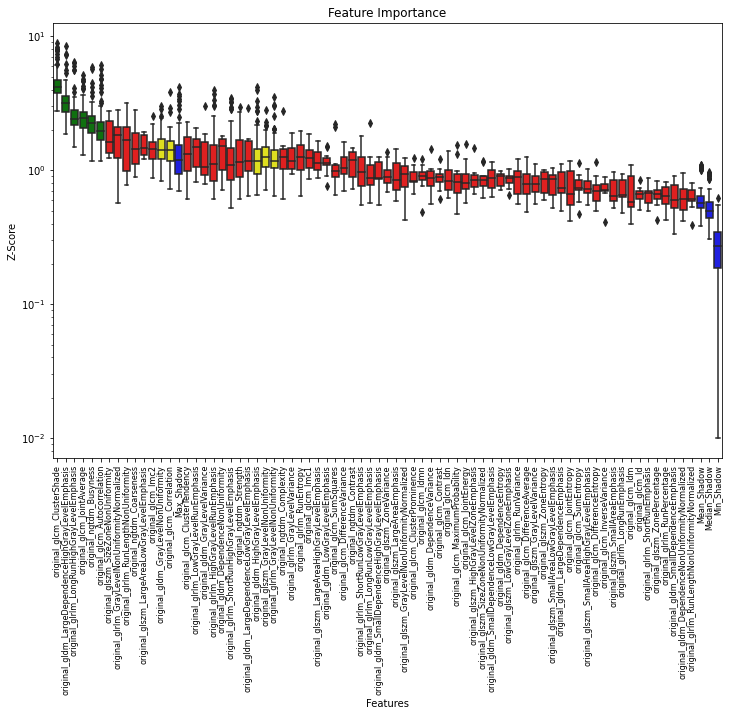

In [16]:
Feature_Selector.plot(#X_size=8, #figsize=(12,8),
                      y_scale='log', which_features='all')

In [17]:
Feature_Selector.TentativeRoughFix()

3 tentative features are now accepted: ['original_gldm_GrayLevelNonUniformity'
 'original_glszm_GrayLevelNonUniformity' 'original_glcm_Correlation']
2 tentative features are now rejected: ['original_gldm_HighGrayLevelEmphasis'
 'original_glrlm_GrayLevelNonUniformity']


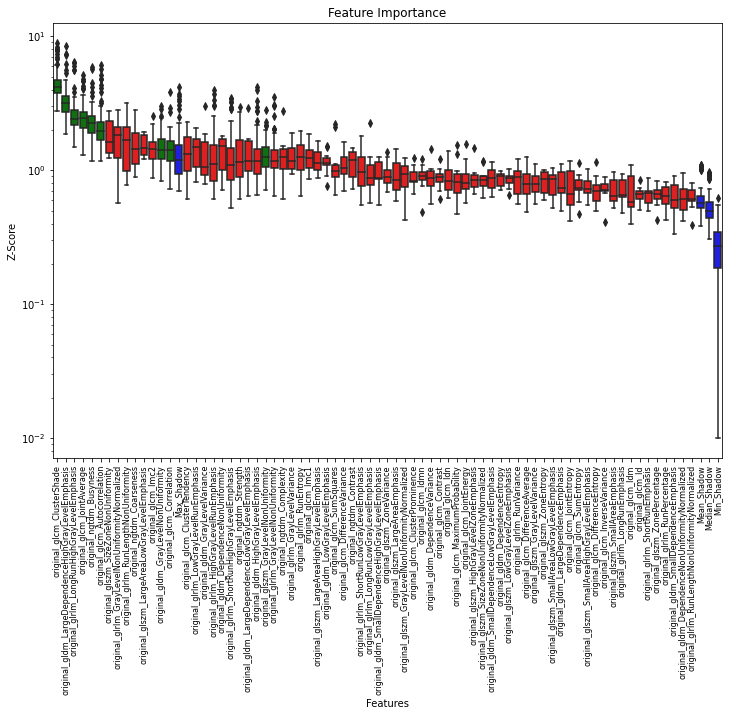

In [18]:
Feature_Selector.plot(#X_size=8, figsize=(12,8),
                      y_scale='log', which_features='all')

['original_glrlm_LongRunHighGrayLevelEmphasis', 'original_glcm_Autocorrelation', 'original_glcm_JointAverage', 'original_glcm_ClusterShade', 'original_gldm_LargeDependenceHighGrayLevelEmphasis', 'original_ngtdm_Busyness']
['original_gldm_GrayLevelNonUniformity'
 'original_glszm_GrayLevelNonUniformity' 'original_glcm_Correlation']

In [20]:
X_select = Feature_Selector.Subset()
X_select.head()

,original_glrlm_LongRunHighGrayLevelEmphasis,original_glcm_Autocorrelation,original_glcm_JointAverage,original_glcm_ClusterShade,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_ngtdm_Busyness,original_gldm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformity,original_glcm_Correlation
0,1071.714043,879.017944,29.006695,-888.628689,8416.786528,4.997464,2542.711640,981.855701,0.631898
1,1199.466439,740.055912,25.972572,-3880.979299,34621.544160,0.494121,251.804424,71.699248,0.782187
2,550.901263,407.441884,19.001428,265.978672,6537.995634,10.214179,3558.227131,890.470860,0.802107
3,440.413857,333.866681,17.322945,58.445276,4865.973373,3.186253,1054.824572,263.132629,0.747726
4,1014.675607,712.583231,25.705584,-1444.645136,14186.846910,4.020551,3930.823973,709.239855,0.864348


In [21]:
# save the results to csv filename is called feature_importance
Feature_Selector.results_to_csv(filename='./file/original_feature_importance')

## After selection, then do machine learning modeling

In [22]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import model_selection
from sklearn.neural_network import MLPClassifier
from sklearn import ensemble
from scipy import interp
import matplotlib
warnings.filterwarnings('ignore')
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)

clf = ensemble.RandomForestClassifier(bootstrap=True, 
                                      n_estimators=100, random_state=1)

clf1 = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(5, 2), random_state=1)

In [23]:
std = StandardScaler()
X_std = std.fit_transform(X_select)
print(X_std.shape)
print(y.shape)

(127, 9)
(127,)


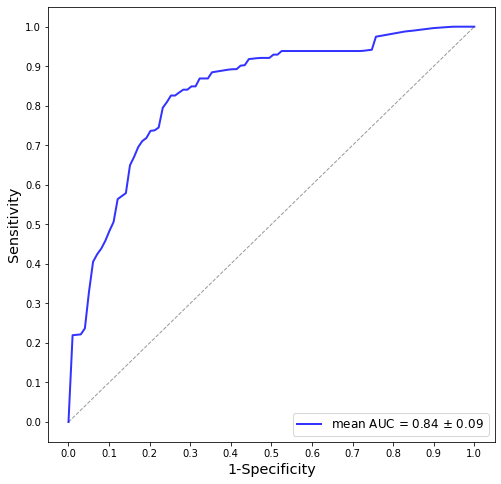

In [24]:
cv = model_selection.ShuffleSplit(n_splits = 10, test_size = 0.25, random_state = 1)
#classifier = clf1
#cv = model_selection.StratifiedKFold(n_splits=5)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))

for train, test in cv.split(X_std, y):
    probas_ = clf.fit(X_std[train], y[train]).predict_proba(X_std[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray',alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',label=r'mean AUC = %0.2f $\pm$ %0.2f' % (mean_auc, std_auc),lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
#plt.xlim([-0, 1])
#plt.ylim([-0, 1])
plt.xlabel('1-Specificity', fontsize = 'x-large')
plt.ylabel('Sensitivity', fontsize = 'x-large')
#plt.title('Receiver operating characteristic example', fontsize = 'x-large')
plt.legend(loc="lower right" , fontsize = 'large')
plt.savefig('./figures/original_val_roc.jpg',dpi=1200)
plt.show()

In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
y_true = y
y_scores = clf.predict(X_std)
roc_auc_score(y_true, y_scores)
m1 = classification_report(y_true, y_scores)
print(m1)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        80
           1       0.94      0.98      0.96        47

    accuracy                           0.97       127
   macro avg       0.96      0.97      0.97       127
weighted avg       0.97      0.97      0.97       127



In [26]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_true, y_scores)
print(cm1)

[[77  3]
 [ 1 46]]


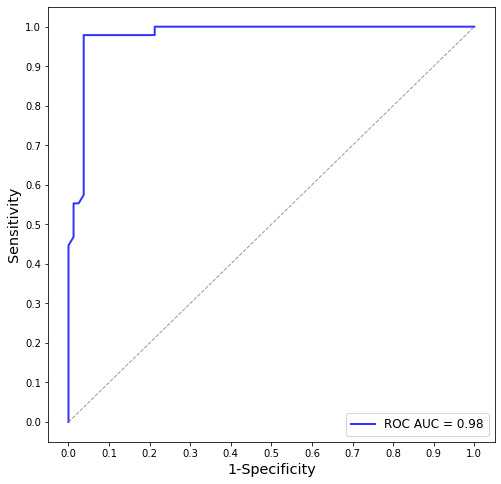

In [27]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
lw=2
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)

probas_ = clf.predict_proba(X_std)
fpr, tpr, thresholds = roc_curve(y, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='b', alpha=.8, lw=lw, linestyle='-',label='ROC AUC = %0.2f' % roc_auc) 
#plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--',alpha=.6)
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.8)
plt.xlabel('1-Specificity', fontsize = 'x-large')
plt.ylabel('Sensitivity', fontsize = 'x-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,fontsize = 'large')
plt.savefig('./figures/original_train_roc.jpg',dpi=1200)
plt.show()

## Test the model

In [28]:
dff = pd.read_csv('./data/test/original.csv')
#dff = dff.drop(columns=['ID'])
#dff_drop = dff.dropna(axis=0)
dff.info()
dff.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 77 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Image                                               60 non-null     object 
 1   Mask                                                60 non-null     object 
 2   ID                                                  60 non-null     int64  
 3   y                                                   60 non-null     int64  
 4   original_glcm_Autocorrelation                       60 non-null     float64
 5   original_glcm_JointAverage                          60 non-null     float64
 6   original_glcm_ClusterProminence                     60 non-null     float64
 7   original_glcm_ClusterShade                          60 non-null     float64
 8   original_glcm_ClusterTendency                       60 non-null     float64
 9   o

,Image,Mask,ID,y,original_glcm_Autocorrelation,original_glcm_JointAverage,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,...,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,I:\Series\110\data.nrrd,I:\Series\110\seg1.nrrd,110,1,1064.864905,31.527403,1.057705e+06,774.927801,348.538187,65.087832,...,0.015776,0.002399,0.369919,394.116442,0.001073,0.257572,0.000819,24228.059380,0.094385,9.453595
1,I:\Series\111\data.nrrd,I:\Series\111\seg1.nrrd,111,1,1071.651791,31.489853,4.476541e+05,2803.980219,450.655499,130.858601,...,0.010797,0.001993,0.486491,545.559266,0.001077,0.481353,0.001320,9276.771002,0.385333,1.977933
2,I:\Series\111\data.nrrd,I:\Series\111\seg2.nrrd,111,1,997.321726,30.556660,2.595045e+05,-1523.242949,352.037353,98.253245,...,0.011084,0.002825,0.496784,465.197036,0.001865,0.311158,0.002371,5516.581279,0.412951,2.159720
3,I:\Series\112\data.nrrd,I:\Series\112\seg1.nrrd,112,0,373.748527,18.672440,1.158058e+05,2321.246382,135.425598,35.126042,...,0.061589,0.004314,0.274825,131.770752,0.001298,0.910447,0.000944,3523.956351,0.090549,1.509259
4,I:\Series\112\data.nrrd,I:\Series\112\seg2.nrrd,112,0,532.136322,22.003146,3.494672e+05,5838.460471,267.443179,75.603874,...,0.030739,0.003758,0.384113,246.804855,0.001651,0.619310,0.001096,7350.320164,0.171510,2.314231


In [29]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(dff['y']))}
class_mapping

{0: 0, 1: 1}

['original_glrlm_LongRunHighGrayLevelEmphasis', 'original_glcm_Autocorrelation', 'original_glcm_JointAverage', 'original_glcm_ClusterShade', 'original_gldm_LargeDependenceHighGrayLevelEmphasis', 'original_ngtdm_Busyness'] ['original_gldm_GrayLevelNonUniformity' 'original_glszm_GrayLevelNonUniformity' 'original_glcm_Correlation']

In [30]:
dff1 = dff[['original_glrlm_LongRunHighGrayLevelEmphasis', 
            'original_glcm_Autocorrelation', 
            'original_glcm_JointAverage', 
            'original_glcm_ClusterShade', 
            'original_gldm_LargeDependenceHighGrayLevelEmphasis', 
            'original_ngtdm_Busyness',
            'original_gldm_GrayLevelNonUniformity',
            'original_glszm_GrayLevelNonUniformity',
            'original_glcm_Correlation']]

In [31]:
dff1.head()

,original_glrlm_LongRunHighGrayLevelEmphasis,original_glcm_Autocorrelation,original_glcm_JointAverage,original_glcm_ClusterShade,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_ngtdm_Busyness,original_gldm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformity,original_glcm_Correlation
0,1342.758962,1064.864905,31.527403,774.927801,11240.628020,0.257572,402.400881,128.365477,0.682328
1,1216.652871,1071.651791,31.489853,2803.980219,5757.996915,0.481353,165.685996,85.729642,0.549814
2,1108.214999,997.321726,30.556660,-1523.242949,5638.080978,0.311158,93.838587,51.960978,0.562430
3,484.843320,373.748527,18.672440,2321.246382,4522.522803,0.910447,494.088755,96.076923,0.587699
4,635.976585,532.136322,22.003146,5838.460471,3854.868414,0.619310,295.805078,98.619371,0.559486


In [32]:
dff['y'] = dff['y'].map(class_mapping)
y1 = LabelEncoder().fit_transform(dff['y'].values)
X1 = dff1.values
print(y1.shape)
print(X1.shape)

(60,)
(60, 9)


In [33]:
X1_std = std.fit_transform(X1)
print(X1_std.shape)

(60, 9)


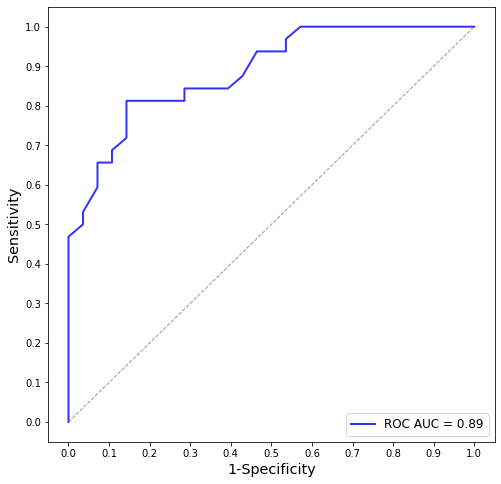

In [34]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
lw=2
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)

probas_ = clf.predict_proba(X1_std)
fpr, tpr, thresholds = roc_curve(y1, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='b', alpha=.8, lw=lw, linestyle='-',label='ROC AUC = %0.2f' % roc_auc) 
#plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--',alpha=.6)
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.8)
plt.xlabel('1-Specificity', fontsize = 'x-large')
plt.ylabel('Sensitivity', fontsize = 'x-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,fontsize = 'large')
plt.savefig('./figures/original_test_roc.jpg',dpi=1200)
plt.show()

In [35]:
y_true = y1
y_scores = clf.predict(X1_std)
roc_auc_score(y_true, y_scores)
m1 = classification_report(y_true, y_scores)
print(m1)
cm1 = confusion_matrix(y_true, y_scores)
print(cm1)

              precision    recall  f1-score   support

           0       0.67      0.93      0.78        28
           1       0.90      0.59      0.72        32

    accuracy                           0.75        60
   macro avg       0.79      0.76      0.75        60
weighted avg       0.79      0.75      0.74        60

[[26  2]
 [13 19]]
